<a href="https://colab.research.google.com/github/MyrnaCCS/Diamond-Price-Prediction/blob/main/Examen_AILab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis exploratorio de datos

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_diamonds = dataset = pd.read_csv('diamonds.csv', index_col="Unnamed: 0")

data_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data_diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Limpieza de datos

In [ ]:
data_diamonds = data_diamonds.drop(data_diamonds[data_diamonds['x'] == 0].index)
data_diamonds = data_diamonds.drop(data_diamonds[data_diamonds['y'] == 0].index)
data_diamonds = data_diamonds.drop(data_diamonds[data_diamonds['z'] == 0].index)
error = data_diamonds["depth"] - (100 * (2 * data_diamonds["z"]) / (data_diamonds["x"] + data_diamonds["y"]) )
data_diamonds = data_diamonds.drop(error[error > 1].index)
data_diamonds = data_diamonds[(data_diamonds["z"] < 30)]

In [ ]:
data_diamonds = data_diamonds.reset_index(drop=True)

# Ingeniería de características

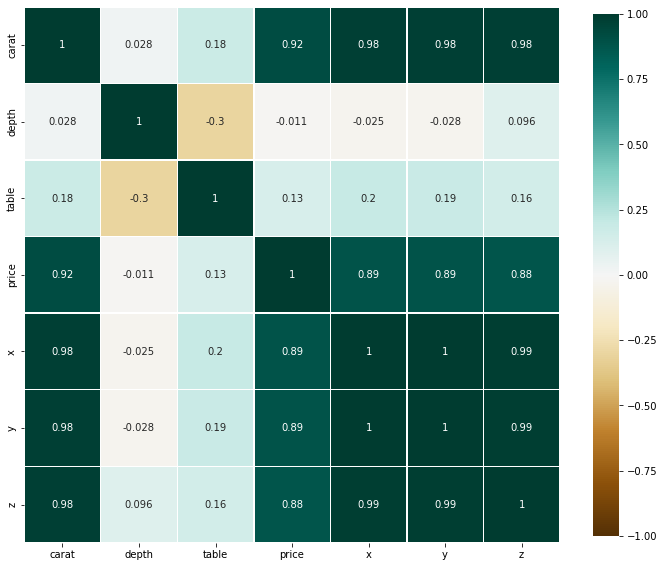

In [ ]:
#correlation matrix
corrmat= data_diamonds.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrmat, vmin=-1, vmax=1, square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .8}, cmap='BrBG')

## PCA

In [ ]:
features = ["carat", "depth", "table", "x", "y", "z"]

X = data_diamonds.copy()
y = X.pop('price')
X = X.loc[:, features]

# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [ ]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-3.097237,-0.367571,-0.655999,0.337083,-0.009255,-0.006359
1,-2.971308,2.326206,0.530040,0.401076,0.032668,0.041720
2,-2.561049,5.009583,0.454438,0.354143,-0.011647,0.104743
3,-2.507114,0.032648,0.714807,0.217246,-0.018490,-0.014691
4,-2.284256,-0.450300,1.119211,0.128404,-0.008010,-0.030655


In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6
carat,0.493288,-0.045434,-0.030934,0.868020,-0.012247,-0.006112
depth,-0.000238,-0.734261,0.671264,-0.015180,-0.007206,-0.099910
table,0.119793,0.669933,0.732640,-0.006977,-0.005312,0.000049
x,0.498288,-0.008248,-0.071516,-0.279351,0.696131,-0.428826
y,0.497951,-0.009502,-0.080752,-0.299124,-0.716954,-0.376743
z,0.496056,-0.099131,0.007057,-0.280624,0.033888,0.814956


In [ ]:
import numpy as np
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression


plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

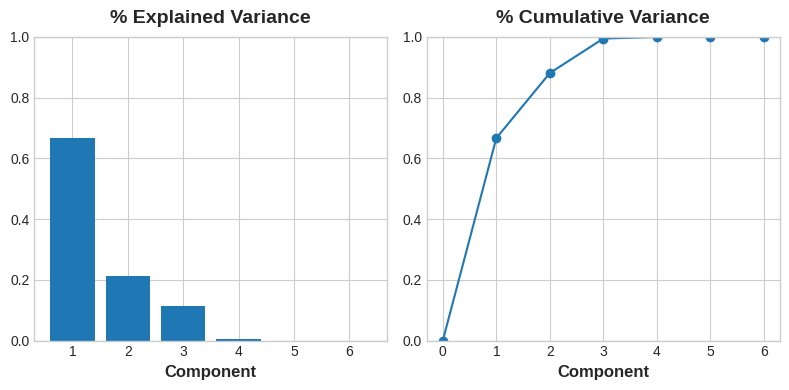

In [ ]:
# Look at explained variance
plot_variance(pca);

In [ ]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC1    1.322218
PC4    0.810593
PC6    0.148859
PC5    0.138577
PC3    0.086852
PC2    0.043733
Name: MI Scores, dtype: float64

# Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split

X = data_diamonds.drop(['price'], axis=1)
y = data_diamonds['price']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [ ]:
# Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_test = X_test.copy()

# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label_X_train[object_cols] = ordinal_encoder.fit_transform(X_train[object_cols])
label_X_test[object_cols] = ordinal_encoder.transform(X_test[object_cols])

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

diamond_model = DecisionTreeRegressor(random_state=1)

# Fit model
diamond_model.fit(label_X_train, y_train)

predicted_diamond_prices = diamond_model.predict(label_X_test)
mean_absolute_error(y_test, predicted_diamond_prices)

362.41043723554304

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(random_state=1)

forest_model.fit(label_X_train, y_train)

diamonds_preds = forest_model.predict(label_X_test)
mean_absolute_error(y_test, diamonds_preds)

276.7459845025705

## XGBoost

In [ ]:
label_X_train_, X_valid, y_train_, y_valid = train_test_split(label_X_train, y_train, test_size=0.2, random_state=7)

In [ ]:
from xgboost import XGBRegressor

diamonds_xgb = XGBRegressor(n_estimators=1000, learning_rate=0.25, n_jobs=4)

diamonds_xgb.fit(label_X_train_, y_train_,
                 early_stopping_rounds=10, 
                 eval_set=[(X_valid, y_valid)], 
                 verbose=False)

diamonds_predictions = diamonds_xgb.predict(label_X_test)
mean_absolute_error(diamonds_predictions, y_test)

[02:02:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


311.2461674888339

In [ ]:
X_pca['color'] = data_diamonds['color'].copy()
X_pca['cut'] = data_diamonds['cut'].copy()
X_pca['clarity'] = data_diamonds['clarity'].copy()

X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, test_size=0.25, random_state=7)
X_pca_train, X_pca_valid, y_pca_train, y_pca_valid = train_test_split(X_pca_train, y_pca_train, test_size=0.2, random_state=7)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_pca_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_pca_valid[object_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_pca_test[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_pca_train.index
OH_cols_valid.index = X_pca_valid.index
OH_cols_test.index = X_pca_test.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_pca_train.drop(object_cols, axis=1)
num_X_valid = X_pca_valid.drop(object_cols, axis=1)
num_X_test = X_pca_test.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

In [ ]:
from xgboost import XGBRegressor

diamonds_xgb = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)

diamonds_xgb.fit(OH_X_train, y_pca_train,
                 early_stopping_rounds=10, 
                 eval_set=[(OH_X_valid, y_pca_valid)], 
                 verbose=False)

diamonds_predictions = diamonds_xgb.predict(OH_X_test)
mean_absolute_error(diamonds_predictions, y_pca_test)

[02:17:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


332.96747537886705

# Deep Learning

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[26]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

In [ ]:
loss = tf.keras.losses.Huber(
    delta=500.0,
    reduction=tf.keras.losses.Reduction.AUTO,
    name='huber_loss'
)

model.compile(optimizer='adam',
              loss=loss)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(OH_X_train, y_pca_train,
                    validation_data=(OH_X_valid, y_pca_valid),
                    batch_size=1024,
                    epochs=150,
                    callbacks=[early_stopping],
                    verbose=False)


# Show the learning curves
history_df = pd.DataFrame(history.history)

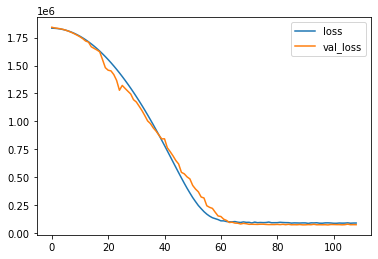

In [ ]:
history_df.loc[:, ['loss', 'val_loss']].plot();

In [ ]:
from sklearn.metrics import mean_absolute_error
pred_prices = model.predict(OH_X_test)
mean_absolute_error(pred_prices, y_pca_test)

270.85252149184186